## Problem Statement

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [53]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 

## Load and check data

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## EDA & Pre Processing

In [3]:
data.shape

(3999, 12)

In [4]:
num_columns = ['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']
cat_columns = ['cc1_miles','cc2_miles','cc3_miles','Award?']

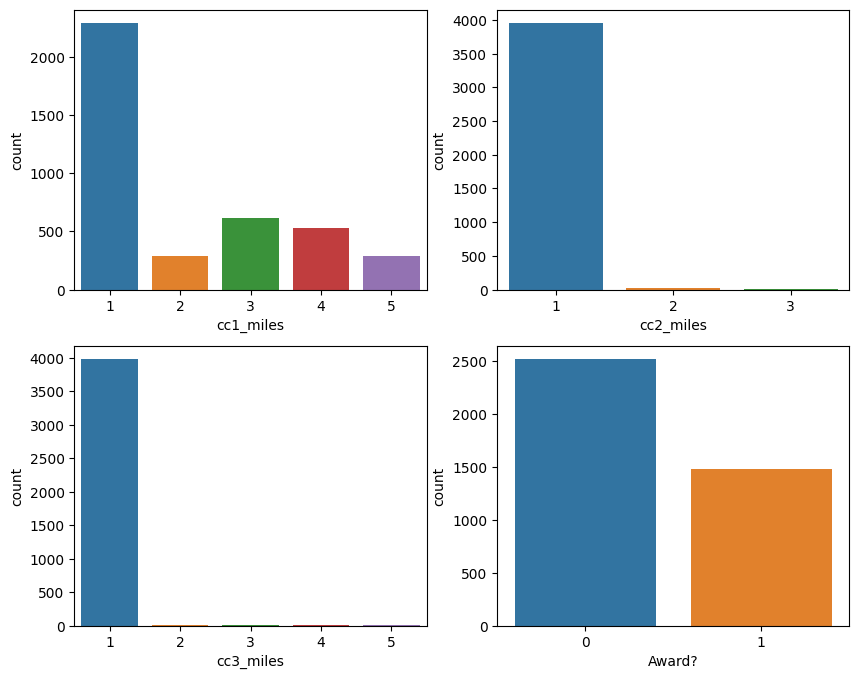

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,8))
for i in range(len(cat_columns)):
    plt.subplot(2,2,i+1)
    sns.countplot(data=data, x = cat_columns[i])

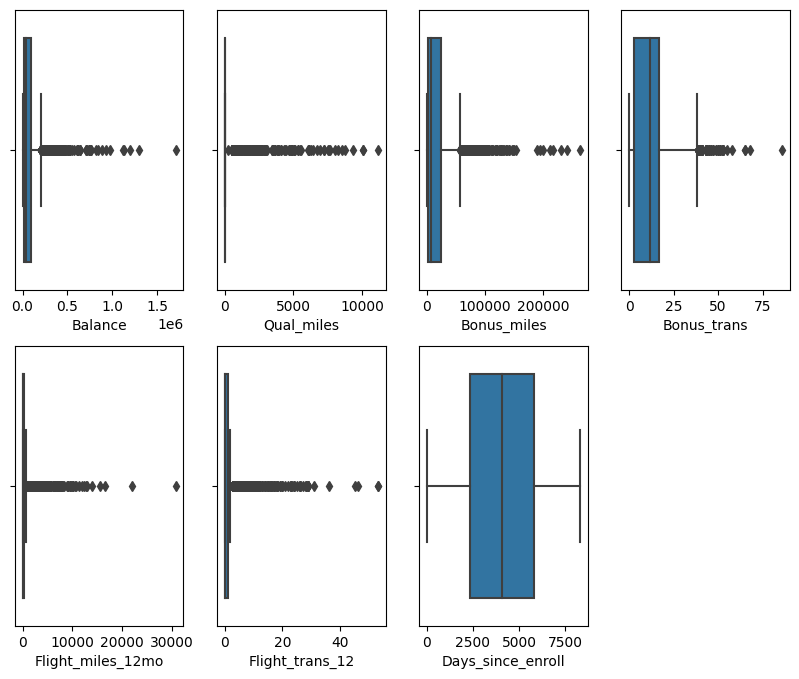

In [7]:
plt.figure(figsize=(10,8))
for i in range(len(num_columns)):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=data, x = num_columns[i])

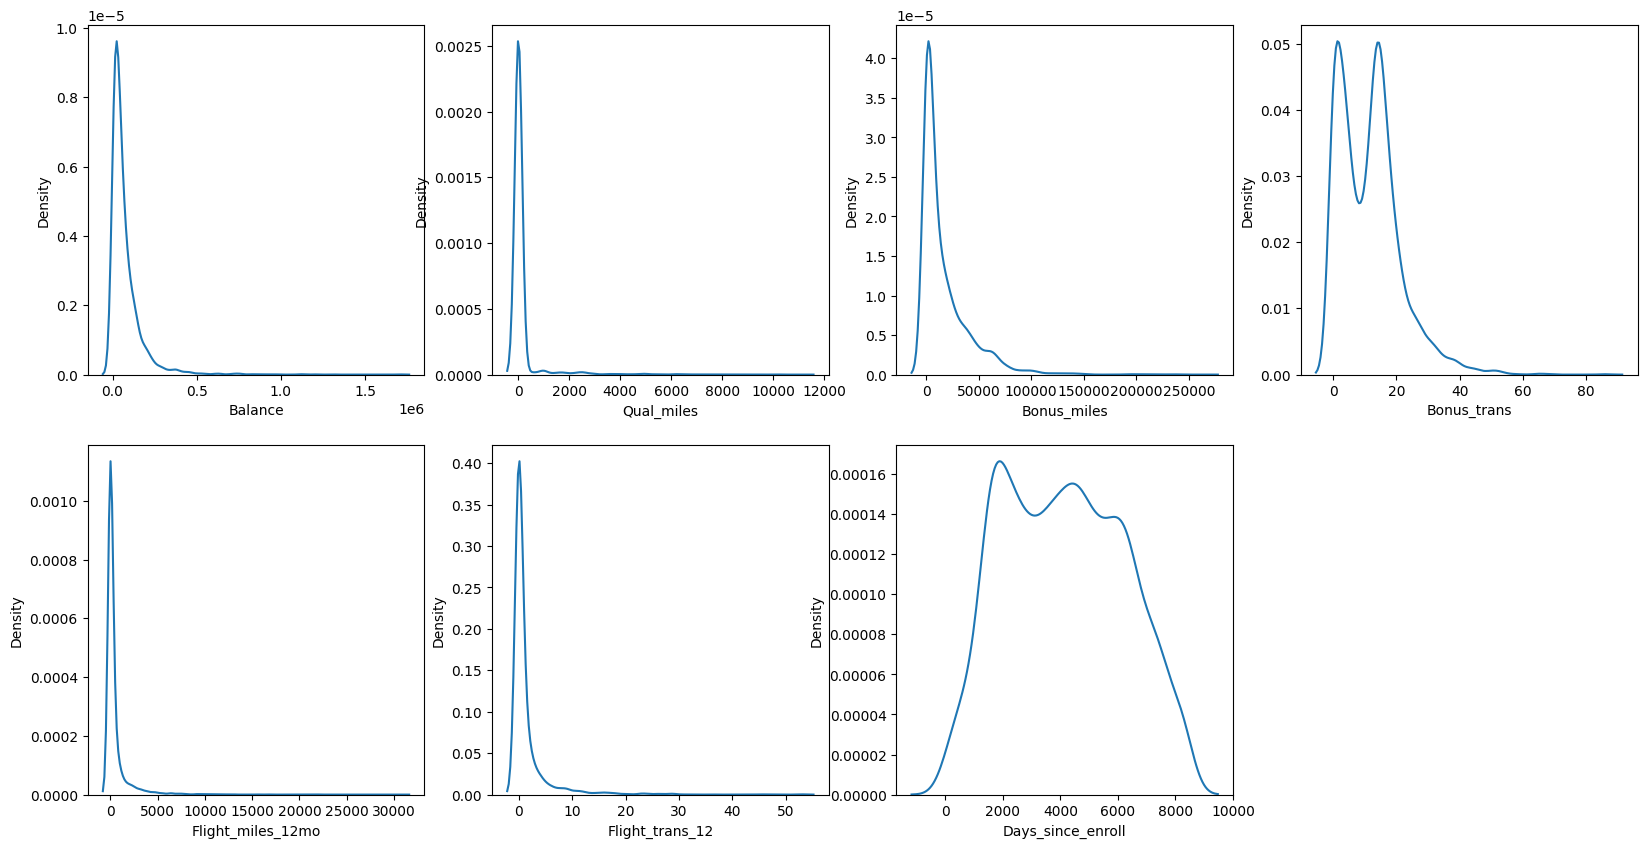

In [8]:
plt.figure(figsize=(20,10))
for i in range(len(num_columns)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(data=data, x = num_columns[i])

In [9]:
data.drop(['ID#'],axis=1,inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
array = data.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [11]:
from sklearn.preprocessing import StandardScaler

stscaler = StandardScaler()
X = stscaler.fit_transform(array)

#### DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1)

In [13]:
dbscan_pred = dbscan.labels_
dbscan_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [20]:
import numpy as np
np.unique(dbscan_pred)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

### DBSCAN : 6 clusters

#### Hierarchical

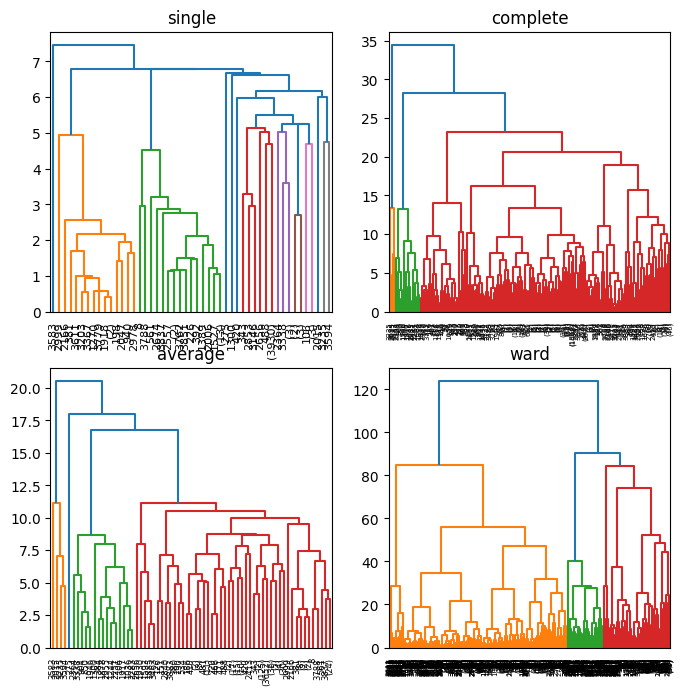

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.cluster.hierarchy as sch
method = ['single', 'complete','average','ward']
plt.figure(figsize=(8,8))
for i in range(len(method)):
    plt.subplot(2,2,i+1)
    dendrogram = sch.dendrogram(sch.linkage(X,method=method[i]),truncate_mode = 'level',p=10)
    plt.title(method[i])

In [22]:
from sklearn.cluster import AgglomerativeClustering

hc1 = AgglomerativeClustering(n_clusters=3,linkage='ward')
hc2 = AgglomerativeClustering(n_clusters=4,linkage='average')

In [23]:
hc_pred1 = hc1.fit_predict(X)
hc_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
np.unique(hc_pred1)

array([0, 1, 2], dtype=int64)

### hier1 : 3 cluters

In [27]:
hc_pred2 = hc2.fit_predict(X)
hc_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
np.unique(hc_pred2)

array([0, 1, 2, 3], dtype=int64)

### hier2 : 4 cluters

#### K-Means

In [30]:
from sklearn.cluster import KMeans

In [31]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

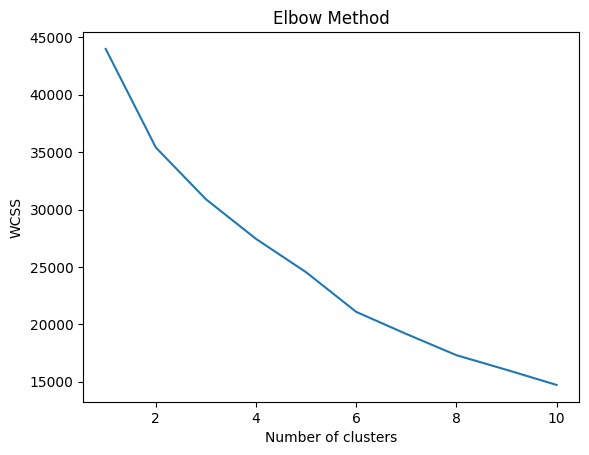

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [33]:
wcss

[43988.999999999985,
 35409.51145242439,
 30899.246824652197,
 27446.372456681365,
 24541.32958204577,
 21089.97362892965,
 19165.861458655658,
 17316.866446128286,
 16043.406242309502,
 14726.983322766793]

In [34]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [35]:
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred

array([0, 0, 0, ..., 1, 0, 0])

### kmeans : 3 clusters

#### All predictions

In [39]:
data['dbscan_pred'] = dbscan_pred
data['hc_pred1'] = hc_pred1
data['hc_pred2'] = hc_pred2
data['kmeans_pred'] = kmeans_pred

data.head(20)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN,Hierarchical1,Hierarchical2,KMeans,dbscan_pred,hc_pred1,hc_pred2,kmeans_pred
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1,0,0,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1,0,0,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,1,0,0,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,1,0,0,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1,1,1,1,1,1
5,16420,0,1,1,1,0,0,0,0,6942,0,0,0,1,0,0,0,1,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0,1,1,1,0,1,1,1
7,20856,0,1,1,1,5250,4,250,1,6938,1,1,0,1,0,1,0,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1,0,1,2,-1,0,1,2
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1,1,1,1,1,1,1,1


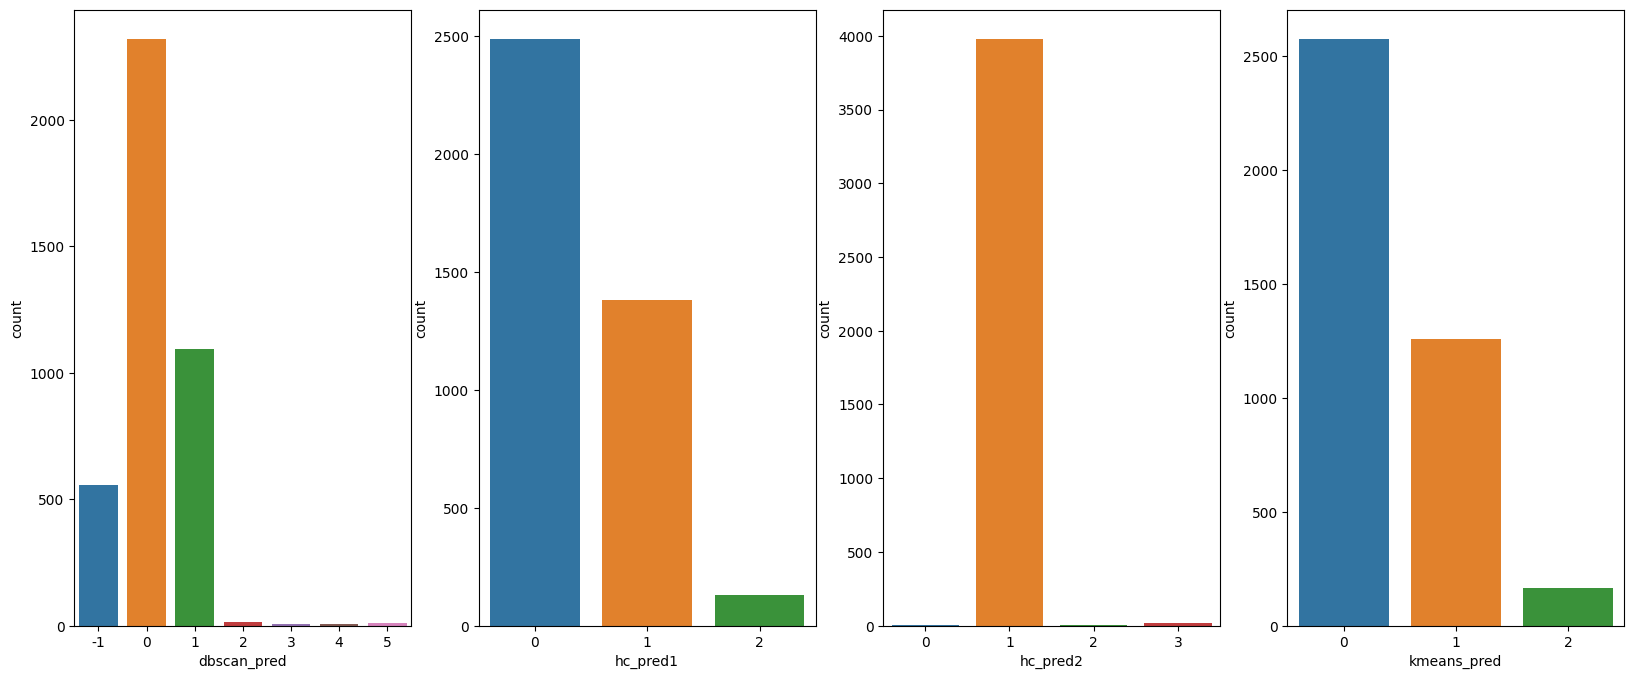

In [45]:
plt.figure(figsize=(20,8))
result = ['dbscan_pred','hc_pred1','hc_pred2','kmeans_pred']
for i in range(len(result)):
    plt.subplot(1,4,i+1)
    sns.countplot(data=data, x = result[i])

So we can see from the above graph that their are 3 clusters.